# **Practice Notebook: Data Preprocessing & Basic Descriptive Analysis**

Welcome to this practice notebook! Here, we will:
1. Create (or import) a simple construction-related dataset.
2. Demonstrate common data preprocessing techniques (handling missing values, duplicates, etc.).
3. Perform basic descriptive statistics and visualizations.

This is a beginner-friendly notebook, so each step is explained in detail. Feel free to run each cell in order and play around with the code.

## 1. Importing Libraries

We'll use Python's popular libraries for data analysis:
- **pandas** for data manipulation and analysis.
- **numpy** for numerical operations.
- **matplotlib** and **seaborn** for data visualization.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner, more modern visuals, let's set a style.
sns.set_theme(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Creating a Sample Dataset

For demonstration, we'll create a small dataset simulating *construction projects*. Each row represents a specific project or a segment of a project. Our columns include:
- **Project_ID**: Unique identifier for each project (some values may be duplicates intentionally to simulate data issues).
- **Phase**: The phase of the project (e.g., Planning, Design, Construction, Maintenance).
- **Location**: Site location.
- **Cost**: Reported cost for that phase (in thousand dollars).
- **Duration**: Duration of the phase in days.
- **Defects_Count**: Number of defects or rework items recorded.
- **Date**: A date the record was created.

We'll intentionally introduce some missing values and duplicates to practice data cleaning.

In [14]:
# Create a dictionary of lists to simulate raw data
data = {
    'Project_ID': [101, 102, 102, 103, 104, 104, 104, 105, 106, 106],
    'Phase': ['Planning', 'Design', 'Construction', 'Construction', 'Planning', 'Construction', 'Maintenance', 'Design', 'Construction', 'Construction'],
    'Location': ['Site A', 'Site B', 'Site B', 'Site C', 'Site A', 'Site A', None, 'Site D', 'Site E', 'Site E'],
    'Cost': [50, 80, np.nan, 200, 40, 150, 100, 90, 180, 180],
    'Duration': [30, 45, 60, 90, np.nan, 75, 120, 30, 90, 90],
    'Defects_Count': [2, 5, 3, 8, 1, 6, None, 2, 7, 7],
    'Date': [
        '2024-01-05', '2024-02-10', '2024-03-15', '2024-03-20',
        '2024-01-10', '2024-04-01', '2024-05-25', '2024-02-15',
        '2024-04-05', '2024-04-05'
    ]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

print("Raw Dataset:")
df

Raw Dataset:


,Project_ID,Phase,Location,Cost,Duration,Defects_Count,Date
0,101,Planning,Site A,50.0,30.0,2.0,2024-01-05
1,102,Design,Site B,80.0,45.0,5.0,2024-02-10
2,102,Construction,Site B,NaN,60.0,3.0,2024-03-15
3,103,Construction,Site C,200.0,90.0,8.0,2024-03-20
4,104,Planning,Site A,40.0,NaN,1.0,2024-01-10
5,104,Construction,Site A,150.0,75.0,6.0,2024-04-01
6,104,Maintenance,None,100.0,120.0,NaN,2024-05-25
7,105,Design,Site D,90.0,30.0,2.0,2024-02-15
8,106,Construction,Site E,180.0,90.0,7.0,2024-04-05
9,106,Construction,Site E,180.0,90.0,7.0,2024-04-05


## 3. Exploratory View of the Data

Let's see how many rows and columns we have, and check the first few records. This step helps us get a quick sense of what the data looks like.

In [15]:
# Shape of the dataset
print("Dataset shape (rows x columns):", df.shape)

# First 5 rows
df.head()

Dataset shape (rows x columns): (10, 7)


,Project_ID,Phase,Location,Cost,Duration,Defects_Count,Date
0,101,Planning,Site A,50.0,30.0,2.0,2024-01-05
1,102,Design,Site B,80.0,45.0,5.0,2024-02-10
2,102,Construction,Site B,NaN,60.0,3.0,2024-03-15
3,103,Construction,Site C,200.0,90.0,8.0,2024-03-20
4,104,Planning,Site A,40.0,NaN,1.0,2024-01-10


## 4. Checking for Missing Values and Duplicates

### 4.1 Missing Values
We'll look at whether any columns have missing values. Missing or `NaN` values can arise from incomplete data entry, sensor failures, or manual collection errors. We can count them or visualize them.



In [16]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
Project_ID       0
Phase            0
Location         1
Cost             1
Duration         1
Defects_Count    1
Date             0
dtype: int64


### 4.2 Duplicates
We also suspect that there might be duplicate rows or repeated project entries. We will check for any **exact** duplicates in the dataset.

In [17]:
# Check for duplicates across entire rows
duplicate_rows = df.duplicated()
print("\nNumber of duplicate rows:", duplicate_rows.sum())

# Display any duplicate rows
if duplicate_rows.sum() > 0:
    display(df[duplicate_rows])
else:
    print("No exact duplicate rows found.")


Number of duplicate rows: 1


,Project_ID,Phase,Location,Cost,Duration,Defects_Count,Date
9,106,Construction,Site E,180.0,90.0,7.0,2024-04-05


## 5. Handling Missing Values

There are various ways to handle missing values. In this example, we will:
1. Drop rows that are entirely missing in **Location** (assuming Location is critical).
2. Fill missing **Cost** or **Duration** using simple imputation (e.g., mean or median).
3. Fill or drop missing values in **Defects_Count** based on assumptions.

> **Tip:** In real scenarios, your choice depends on the nature of the data and domain knowledge (e.g., you might fill cost based on an average from similar project phases).

In [18]:
# Before we fix anything, let's make a copy of the original DataFrame
df_clean = df.copy()

# 1. Drop rows where Location is missing
df_clean = df_clean.dropna(subset=['Location'])

# 2. Fill missing Cost and Duration with their mean values
mean_cost = df_clean['Cost'].mean()
mean_duration = df_clean['Duration'].mean()

df_clean['Cost'] = df_clean['Cost'].fillna(mean_cost)
df_clean['Duration'] = df_clean['Duration'].fillna(mean_duration)

# 3. Fill missing Defects_Count with 0 (assuming no record means no defects)
# or we might choose mean/median if we expect defects to be under-reported.
df_clean['Defects_Count'] = df_clean['Defects_Count'].fillna(0)

# Check the result
print("Missing values per column after cleaning:")
print(df_clean.isna().sum())
df_clean

Missing values per column after cleaning:
Project_ID       0
Phase            0
Location         0
Cost             0
Duration         0
Defects_Count    0
Date             0
dtype: int64


,Project_ID,Phase,Location,Cost,Duration,Defects_Count,Date
0,101,Planning,Site A,50.00,30.00,2.0,2024-01-05
1,102,Design,Site B,80.00,45.00,5.0,2024-02-10
2,102,Construction,Site B,121.25,60.00,3.0,2024-03-15
3,103,Construction,Site C,200.00,90.00,8.0,2024-03-20
4,104,Planning,Site A,40.00,63.75,1.0,2024-01-10
5,104,Construction,Site A,150.00,75.00,6.0,2024-04-01
7,105,Design,Site D,90.00,30.00,2.0,2024-02-15
8,106,Construction,Site E,180.00,90.00,7.0,2024-04-05
9,106,Construction,Site E,180.00,90.00,7.0,2024-04-05


## 6. Removing or Resolving Duplicates

We'll remove any exact duplicate rows. In real scenarios, you might need more nuanced methods if partial duplicates or repeated IDs are expected for legitimate reasons (e.g., multiple phases per project).

In [19]:
# Remove exact duplicates
df_clean.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", df_clean.shape[0])
df_clean

Number of rows after removing duplicates: 8


,Project_ID,Phase,Location,Cost,Duration,Defects_Count,Date
0,101,Planning,Site A,50.00,30.00,2.0,2024-01-05
1,102,Design,Site B,80.00,45.00,5.0,2024-02-10
2,102,Construction,Site B,121.25,60.00,3.0,2024-03-15
3,103,Construction,Site C,200.00,90.00,8.0,2024-03-20
4,104,Planning,Site A,40.00,63.75,1.0,2024-01-10
5,104,Construction,Site A,150.00,75.00,6.0,2024-04-01
7,105,Design,Site D,90.00,30.00,2.0,2024-02-15
8,106,Construction,Site E,180.00,90.00,7.0,2024-04-05


## 7. Basic Descriptive Statistics

Now we have a cleaner dataset. Let's explore some basic statistics:
- **count, mean, std, min, max, quartiles**
- We can look at each column separately (Cost, Duration, Defects_Count).

In [20]:
df_clean.describe()

,Project_ID,Cost,Duration,Defects_Count
count,8.000000,8.000000,8.000000,8.00000
mean,103.375000,113.906250,60.468750,4.25000
std,1.685018,59.045373,24.090024,2.60494
min,101.000000,40.000000,30.000000,1.00000
25%,102.000000,72.500000,41.250000,2.00000
50%,103.500000,105.625000,61.875000,4.00000
75%,104.250000,157.500000,78.750000,6.25000
max,106.000000,200.000000,90.000000,8.00000


### 7.1 Column-Wise Analysis

- **Cost**: Average cost, range, etc.
- **Duration**: Average time.
- **Defects_Count**: Check how many defects are typically reported.

We can also do a quick grouping by `Phase` to see average cost or durations per phase.

In [21]:
# Grouping by Phase to see average cost and duration.
df_clean.groupby('Phase')[['Cost','Duration','Defects_Count']].mean()

,Cost,Duration,Defects_Count
Phase,,,
Construction,162.8125,78.750,6.0
Design,85.0000,37.500,3.5
Planning,45.0000,46.875,1.5


## 8. Correlation Analysis

Sometimes we want to see if any variables are correlated, for instance, does **Cost** correlate with **Duration** or **Defects_Count**?

We'll use `df_clean.corr()` to compute the correlation matrix. Then we'll create a heatmap with seaborn for easy visualization.

               Project_ID      Cost  Duration  Defects_Count
Project_ID       1.000000  0.383419  0.430568       0.235960
Cost             0.383419  1.000000  0.800742       0.901799
Duration         0.430568  0.800742  1.000000       0.757646
Defects_Count    0.235960  0.901799  0.757646       1.000000


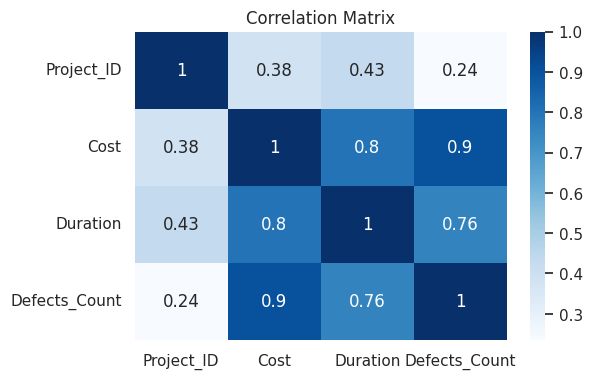

In [22]:
# Calculate correlation matrix
corr_matrix = df_clean.corr(numeric_only=True)
print(corr_matrix)

# Visualize using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

## 9. Basic Data Visualization

### 9.1 Histograms
A **histogram** helps visualize the distribution of a numeric variable, e.g., Cost or Duration.



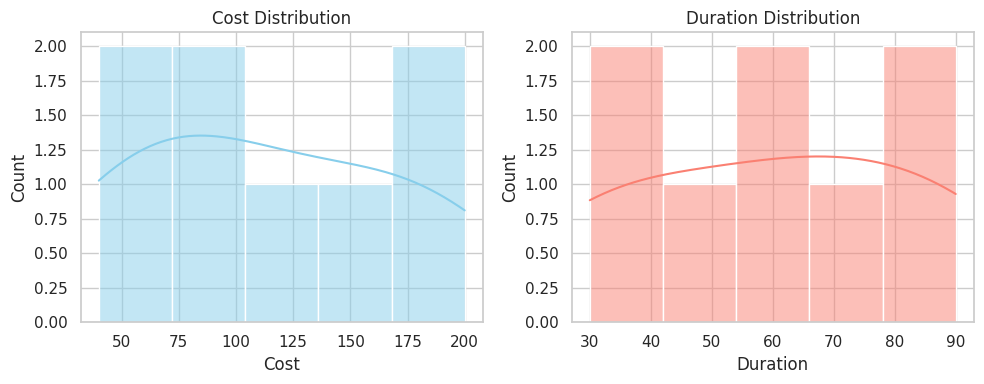

In [23]:
# Histograms for Cost and Duration
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=df_clean, x='Cost', bins=5, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Cost Distribution')

sns.histplot(data=df_clean, x='Duration', bins=5, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Duration Distribution')

plt.tight_layout()
plt.show()

### 9.2 Box Plots
A **box plot** can help detect outliers and understand the quartiles (spread) of the data.

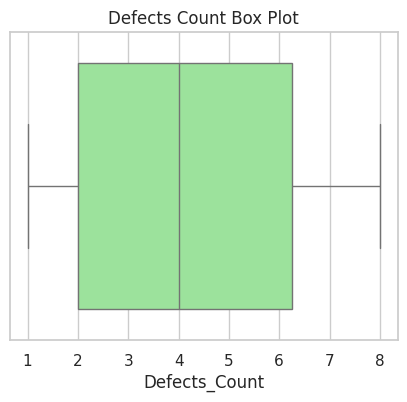

In [24]:
# Box plot for Defects_Count
plt.figure(figsize=(5,4))
sns.boxplot(data=df_clean, x='Defects_Count', color='lightgreen')
plt.title('Defects Count Box Plot')
plt.show()

### 9.3 Bar Chart

We can also visualize the average cost by phase or the total cost by location using a bar chart.

<ipython-input-25-3e84344761df>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_by_phase.index, y=avg_cost_by_phase.values, palette='viridis')


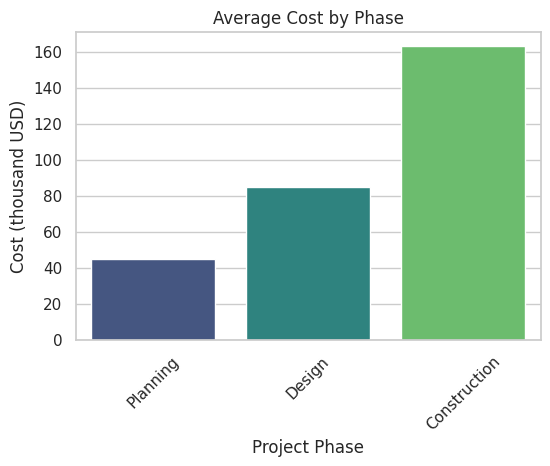

In [25]:
# Bar chart for average cost by phase
avg_cost_by_phase = df_clean.groupby('Phase')['Cost'].mean().sort_values()

plt.figure(figsize=(6,4))
sns.barplot(x=avg_cost_by_phase.index, y=avg_cost_by_phase.values, palette='viridis')
plt.title('Average Cost by Phase')
plt.ylabel('Cost (thousand USD)')
plt.xlabel('Project Phase')
plt.xticks(rotation=45)
plt.show()

## 10. Conclusion & Next Steps

In this notebook, we demonstrated how to:
1. Generate or import a dataset in **pandas**.
2. Inspect missing values and duplicates.
3. Perform basic data cleaning (dropping rows, filling missing data).
4. Calculate descriptive statistics and interpret them.
5. Visualize data distributions and relationships.

### Next Steps:
- **Data Exploration**: Try adding more variables and exploring different plots.
- **Feature Engineering**: Create new features based on domain knowledge (e.g., cost per day, cost per defect).
- **Machine Learning**: Experiment with predictive models for cost, duration, or defect likelihood.
- **Real Data**: Apply these methods to real construction project data sets if available.

Feel free to experiment with different methods of imputation, or test how removing outliers affects the results.